In [202]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as sts

In [4]:
os.chdir("Documents/Netflix/GitLab_files/Project/Project1---Group1")

In [106]:
df=pd.read_csv("state_M2019_dl.csv",na_values=['*','**'])

In [107]:
df.head()


,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,o_group,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,1,Alabama,2,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,...,16.73,26.34,39.26,"18,270","23,000","34,800","54,790","81,660",NaN,NaN
1,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,...,45.03,63.07,90.16,"47,250","66,140","93,660","131,180","187,530",NaN,NaN
2,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,...,86.91,#,#,"68,630","115,110","180,780",#,#,NaN,NaN
3,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,detailed,...,47.42,70.48,#,"48,240","66,370","98,630","146,610",#,NaN,NaN
4,1,Alabama,2,0,Cross-industry,cross-industry,1235,11-1031,Legislators,detailed,...,NaN,NaN,NaN,"16,200","17,210","18,880","28,660","55,220",True,NaN


In [108]:
clmns=df.columns
clmns

Index(['area', 'area_title', 'area_type', 'naics', 'naics_title', 'i_group',
       'own_code', 'occ_code', 'occ_title', 'o_group', 'tot_emp', 'emp_prse',
       'jobs_1000', 'loc_quotient', 'pct_total', 'h_mean', 'a_mean',
       'mean_prse', 'h_pct10', 'h_pct25', 'h_median', 'h_pct75', 'h_pct90',
       'a_pct10', 'a_pct25', 'a_median', 'a_pct75', 'a_pct90', 'annual',
       'hourly'],
      dtype='object')

In [109]:
df['occ_title']=df['occ_title'].apply(lambda x:x.lower())

In [110]:
occupations=df['occ_title'].unique()

In [111]:
occupations
keywords = ['engineer', 'computer', 'data', 'techni', 'technologist', 'software', 'application', 'developer', 'scientist', 'mathematic', 'database', 'analy']

In [112]:
df_tech=df[df['occ_title'].str.contains('|'.join(keywords), regex=True)]
len(df_tech)

6230

(array([805., 672., 679., 665., 637., 627., 558., 527., 504., 454.]),
 array([   0. ,  436.2,  872.4, 1308.6, 1744.8, 2181. , 2617.2, 3053.4,
        3489.6, 3925.8, 4362. ]),
 <a list of 10 Patch objects>)

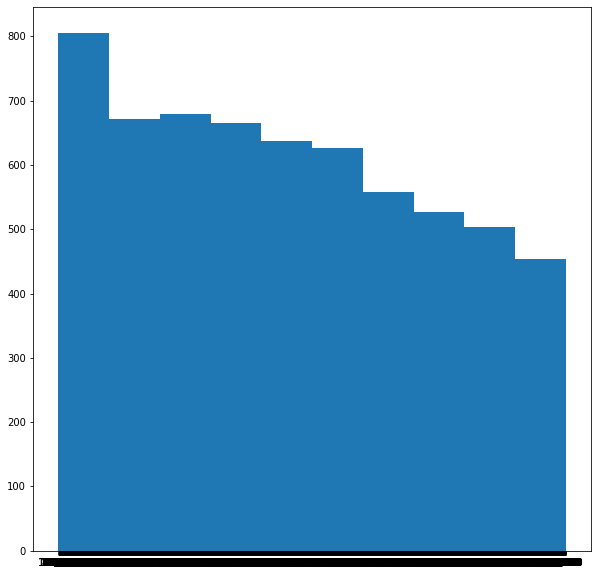

In [113]:
plt.figure(figsize=(10,10))
plt.hist(df_tech['a_median'].dropna())

In [104]:
jobs_per_state=df_tech.groupby('area_title')['tot_emp'].sum()

TypeError: can only concatenate str (not "int") to str

In [105]:
df_tech[df_tech['area_title']=='Wyoming'].loc[:,['occ_title','jobs_1000', 'tot_emp']]

,occ_title,jobs_1000,tot_emp
34831,computer and information systems managers,0.725,200
34842,architectural and engineering managers,0.664,180
34860,management analysts,1.372,380
34863,"compensation, benefits, and job analysis speci...",0.173,50
34865,market research analysts and marketing special...,1.426,390
...,...,...,...
35305,stationary engineers and boiler operators,0.327,90
35320,computer numerically controlled tool operators,0.118,30
35327,"ambulance drivers and attendants, except emerg...",0.301,80
35334,locomotive engineers,2.055,560


ValueError: could not convert string to float: '**'

In [120]:
nan_indices=df_tech[df_tech['tot_emp'].isna()].index
df_tot_emp=df_tech.drop(index=nan_indices)

In [123]:
g=df_tot_emp[df_tot_emp['area_title']=='California'].loc[:,['occ_title','jobs_1000', 'tot_emp']]
g['tot_emp']=g['tot_emp'].apply(lambda x: float(x.replace(',','')))
g

,occ_title,jobs_1000,tot_emp
2681,computer and information systems managers,4.355,75700.0
2695,architectural and engineering managers,1.964,34140.0
2718,management analysts,5.981,103970.0
2721,"compensation, benefits, and job analysis speci...",0.612,10630.0
2723,market research analysts and marketing special...,5.682,98760.0
...,...,...,...
3432,"ambulance drivers and attendants, except emerg...",0.075,1310.0
3439,locomotive engineers,0.102,1770.0
3440,"rail yard engineers, dinkey operators, and hos...",0.051,890.0
3448,ship engineers,0.018,310.0


In [124]:
g['tot_emp'].sum()

4103040.0

In [126]:
def drop_by_col(col_name):
    nan_indices=df[df[col_name].isna()].index
    return df.drop(index=nan_indices)


In [ ]:
df_california=df[df['area_title']=='California']

In [191]:
df_survey=pd.read_csv('2019_Data_Professional_Salary_Survey_Responses.csv',skiprows=2, header=1)
df_survey_us=df_survey[df_survey['Country']=='United States']
df_survey_us=df_survey_us[df_survey_us['Survey Year']==2019]
df_survey_us.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
6011,2019,12/6/2018 13:58:02,128500,United States,442,Microsoft SQL Server,15,"Microsoft SQL Server, Oracle",Full time employee,Architect,...,40,"None, or less than 1 day per week",300K-1M (large city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, Projects",1
6013,2019,12/11/2018 6:24:30,110000,United States,43016,Microsoft SQL Server,18,Azure SQL DB,Full time employee,"DBA (Development Focus - tunes queries, indexe...",...,44,"None, or less than 1 day per week",1M+ (metropolis),Private business,No,"Stay with the same employer, same role",Male,DBA (Production Focus - build & troubleshoot s...,"Build scripts & automation tools, Manual tasks...",1
6015,2019,12/11/2018 6:26:28,65000,United States,NaN,Microsoft SQL Server,3,"Microsoft SQL Server, MySQL/MariaDB",Full time employee,Developer: T-SQL,...,45,"None, or less than 1 day per week",100K-299K (city),Private business,No,"Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Build scripts & automation tools, Manual tasks...",1
6017,2019,12/11/2018 6:30:47,116500,United States,605,Microsoft SQL Server,12,"PostgreSQL, MongoDB, Azure SQL DB",Full time employee of a consulting/contracting...,Architect,...,30,5 or more,1M+ (metropolis),Private business,"Yes, but only passively (just curious)",Prefer not to say,Male,DBA (General - splits time evenly between writ...,"Build scripts & automation tools, Manual tasks...",1
6019,2019,12/11/2018 6:33:56,124000,United States,92105,Microsoft SQL Server,18,Oracle,Full time employee,DBA (General - splits time evenly between writ...,...,40,4,1M+ (metropolis),Private business,"Yes, actively looking for something else","Stay with the same role, but change employers",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Projects, R&D",1


In [192]:
#2
education_cnt=df_survey_us.groupby('Education')['Education'].count()
education_cnt

Education
Associates (2 years)           73
Bachelors (4 years)           338
Doctorate/PhD                   3
Masters                        96
None (no degree completed)     92
Name: Education, dtype: int64

<BarContainer object of 5 artists>

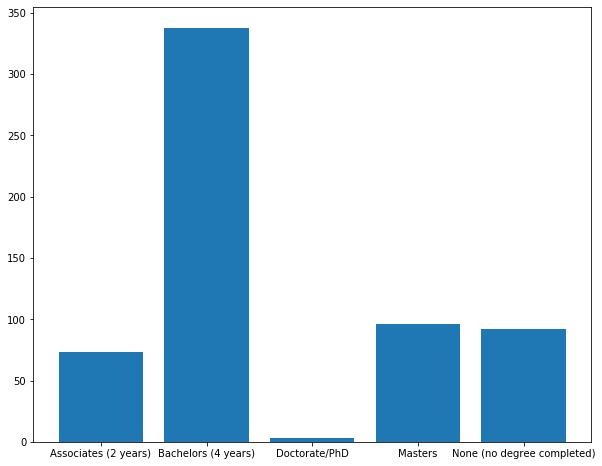

In [193]:
#2
plt.figure(figsize=(10,8))
plt.bar(education_cnt.index, education_cnt.values)


In [194]:
education_levels=df_survey_us['Education'].unique()
education_levels

array(['Bachelors (4 years)', 'None (no degree completed)', 'Masters',
       'Associates (2 years)', 'Doctorate/PhD'], dtype=object)

In [195]:
sal_edu=df_survey_us[['Education', 'SalaryUSD']]
sal_edu

,Education,SalaryUSD
6011,Bachelors (4 years),128500
6013,Bachelors (4 years),110000
6015,None (no degree completed),65000
6017,Masters,116500
6019,Bachelors (4 years),124000
...,...,...
6883,Bachelors (4 years),101500
6884,Bachelors (4 years),107000
6886,Bachelors (4 years),132000
6887,Associates (2 years),58500


In [196]:
sal_edu['SalaryUSD']=sal_edu['SalaryUSD'].apply(lambda x:float(x.replace(',','').replace('$','').replace(' ','')))

/Users/anino1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
sal_edu.groupby('Education')['SalaryUSD'].mean()

Education
Associates (2 years)          103843.013699
Bachelors (4 years)           105115.766272
Doctorate/PhD                 125600.000000
Masters                       117603.666667
None (no degree completed)    107025.195652
Name: SalaryUSD, dtype: float64

In [223]:
sal_edu.groupby('Education')['SalaryUSD'].count()

Education
Associates (2 years)           73
Bachelors (4 years)           338
Doctorate/PhD                   3
Masters                        96
None (no degree completed)     92
Name: SalaryUSD, dtype: int64

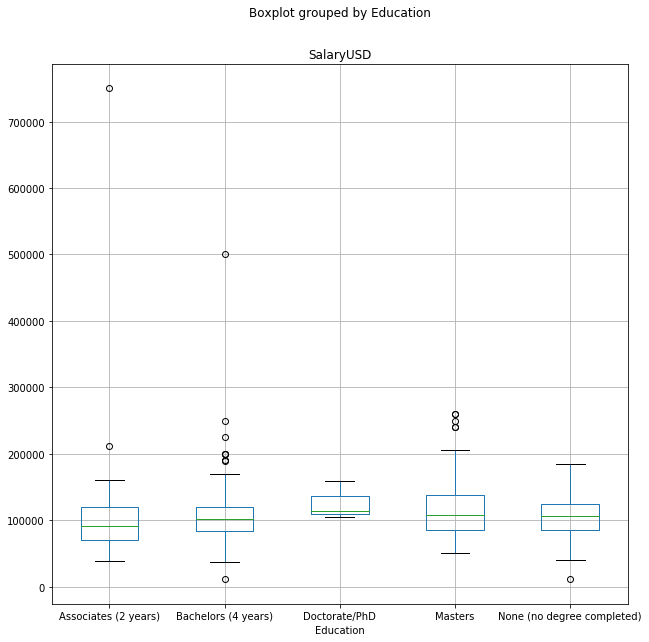

In [198]:
sal_edu.boxplot('SalaryUSD','Education',figsize=(10,10))

In [211]:
data={i:sal_edu[sal_edu['Education']==i]['SalaryUSD'].values for i in education_levels}

In [216]:
education_levels

array(['Bachelors (4 years)', 'None (no degree completed)', 'Masters',
       'Associates (2 years)', 'Doctorate/PhD'], dtype=object)

In [220]:
masters=data['Masters']
Bachelors=data['Bachelors (4 years)']
nodeg=data['None (no degree completed)']
Associates=data['Associates (2 years)']
phd=data['Doctorate/PhD']
deg_vals=[masters, Bachelors, nodeg, Associates, phd]

In [230]:
sts.f_oneway(masters, Bachelors,nodeg, Associates, phd)

F_onewayResult(statistic=0.26394500399083104, pvalue=0.8513799223290898)